In [338]:
import pandas as pd
from google.colab import files
!pip install wget
import wget
from genericpath import exists
import numpy as np

# Define column names for the Boston Housing dataset
boston_col_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

# Download the UCI ML Boston Housing dataset
if (not exists("housing.data")):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
    filename = wget.download(url, out="housing.data")
    print("Downloaded: " + str(filename))
else:
    print("Boston Housing dataset already downloaded")

# Load the Boston Housing dataset into df1
try:
    df1 = pd.read_csv("housing.data", header=None, delim_whitespace=True, names=boston_col_names)
    print("Boston data loaded into df1 successfully!")
    print(df1.head())
except Exception as e:
    print(f"An error occurred: {e}")

# Download the Wine dataset
if (not exists("wine.data")):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
    filename = wget.download(url)
    print("Downloaded: " + str(filename))
else:
    print("Wine dataset already downloaded")

# Load the Wine dataset into df2
try:
    df2 = pd.read_csv("wine.data", header=None)  # Assuming there are no headers
    print("Wine data loaded into df2 successfully!")
    print(df2.head())
except Exception as e:
    print(f"An error occurred: {e}")

# Removing the 'B' feature from df1 (Boston dataset)
df1 = df1.drop(['B'], axis=1)
print(df1.head())



Boston Housing dataset already downloaded
Boston data loaded into df1 successfully!
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Wine dataset already downloaded
Wine data loaded into df2 successfully!
   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.

In [339]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       17

In [340]:
# Checking for any negative values in features where it does not make sense
anomalies_df1 = (df1 < 0).sum()
if anomalies_df1.sum() > 0:
    print("Anomalies in df1 (Wine dataset):")
    print(anomalies_df1)
else:
    print("No anomalies in df1 (Boston dataset)")

anomalies_df2 = (df2 < 0).sum()
if anomalies_df2.sum() > 0:
    print("Anomalies in df2 (Wine dataset):")
    print(anomalies_df2)
else:
    print("No anomalies in df2 (Wine dataset)")
# We also checked for misisng vlaues, turns out there's no missing value.

No anomalies in df1 (Boston dataset)
No anomalies in df2 (Wine dataset)


In [341]:
# Check for duplicate rows in df1 and df2
if df1.duplicated().any():
    print("There are duplicate rows in df1.")
    # Decide whether to keep the first occurrence and drop the rest, or remove all duplicates
    # df1 = df1.drop_duplicates(keep='first')
else:
    print("There are no duplicate rows in df1.")

if df2.duplicated().any():
    print("There are duplicate rows in df2.")
else:
    print("There are no duplicate rows in df2.")

# Check for possible outliers in df1 and df2 using the IQR method
Q1_df1 = df1.quantile(0.25)
Q3_df1 = df1.quantile(0.75)
IQR_df1 = Q3_df1 - Q1_df1
outliers_df1 = ((df1 < (Q1_df1 - 1.5 * IQR_df1)) | (df1 > (Q3_df1 + 1.5 * IQR_df1))).any(axis=1)

Q1_df2 = df2.quantile(0.25)
Q3_df2 = df2.quantile(0.75)
IQR_df2 = Q3_df2 - Q1_df2
outliers_df2 = ((df2 < (Q1_df2 - 1.5 * IQR_df2)) | (df2 > (Q3_df2 + 1.5 * IQR_df2))).any(axis=1)

print(f"Number of rows with outliers in df1: {outliers_df1.sum()}")
print(f"Number of rows with outliers in df2: {outliers_df2.sum()}")



There are no duplicate rows in df1.
There are no duplicate rows in df2.
Number of rows with outliers in df1: 197
Number of rows with outliers in df2: 17


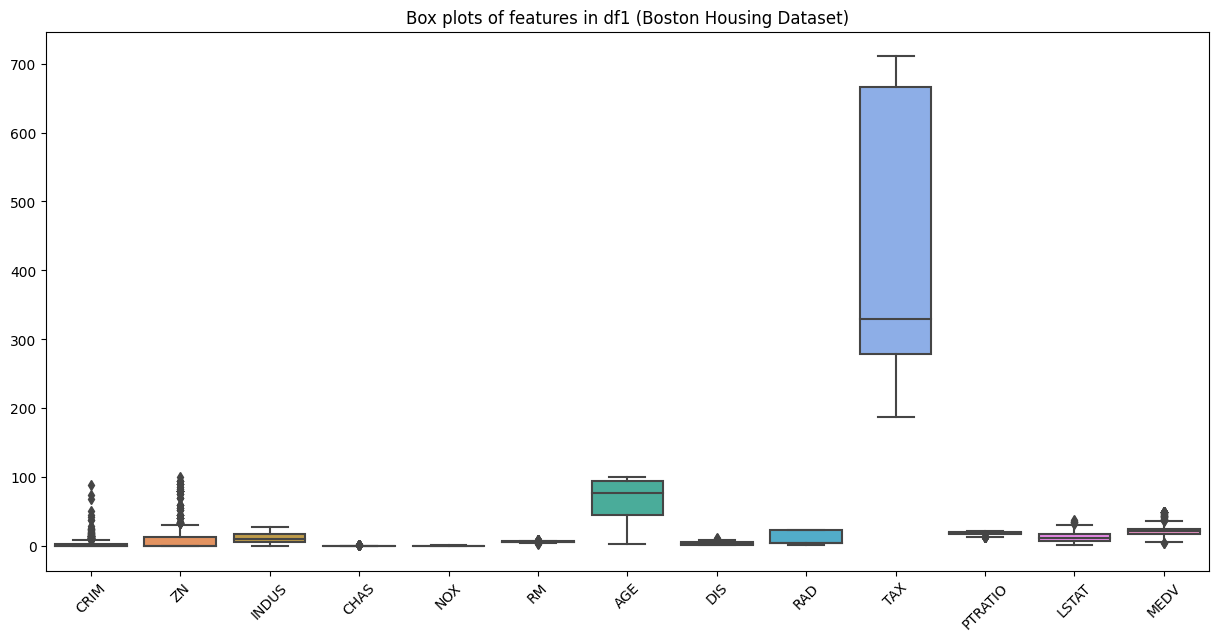

In [343]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Draw a box plot for each feature in df1
sns.boxplot(data=df1)
plt.title('Box plots of features in df1 (Boston Housing Dataset)')
plt.xticks(rotation=45)
plt.show()


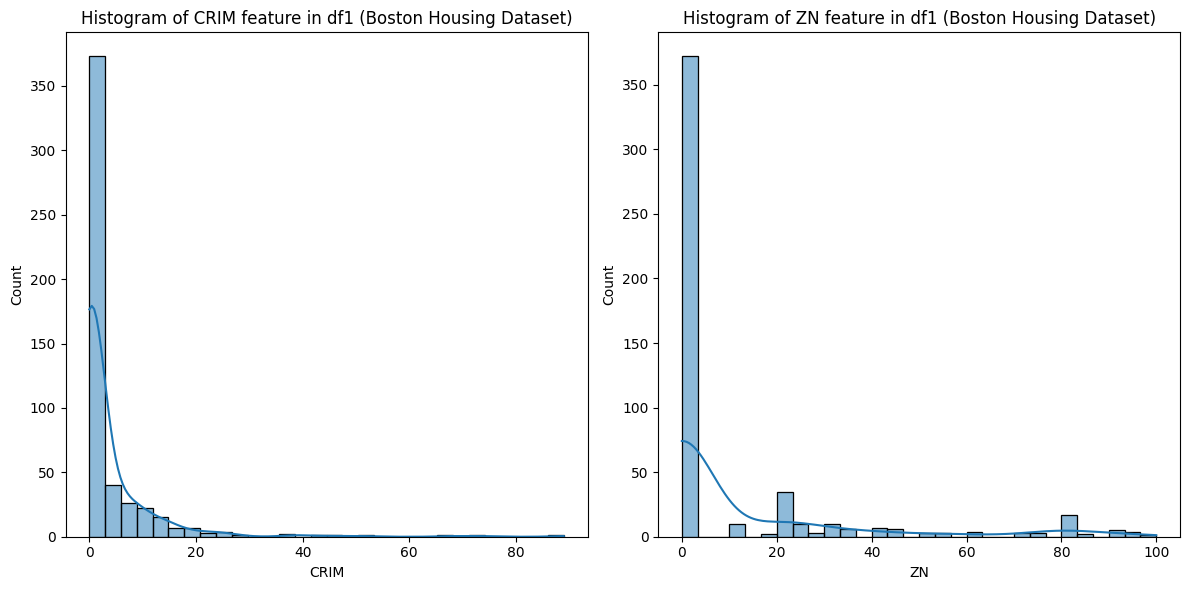

In [344]:
plt.figure(figsize=(12, 6))

# Subplot 1: CRIM
plt.subplot(1, 2, 1)
sns.histplot(df1['CRIM'], bins=30, kde=True)
plt.title('Histogram of CRIM feature in df1 (Boston Housing Dataset)')

# Subplot 2: ZN
plt.subplot(1, 2, 2)
sns.histplot(df1['ZN'], bins=30, kde=True)
plt.title('Histogram of ZN feature in df1 (Boston Housing Dataset)')

plt.tight_layout()
plt.show()


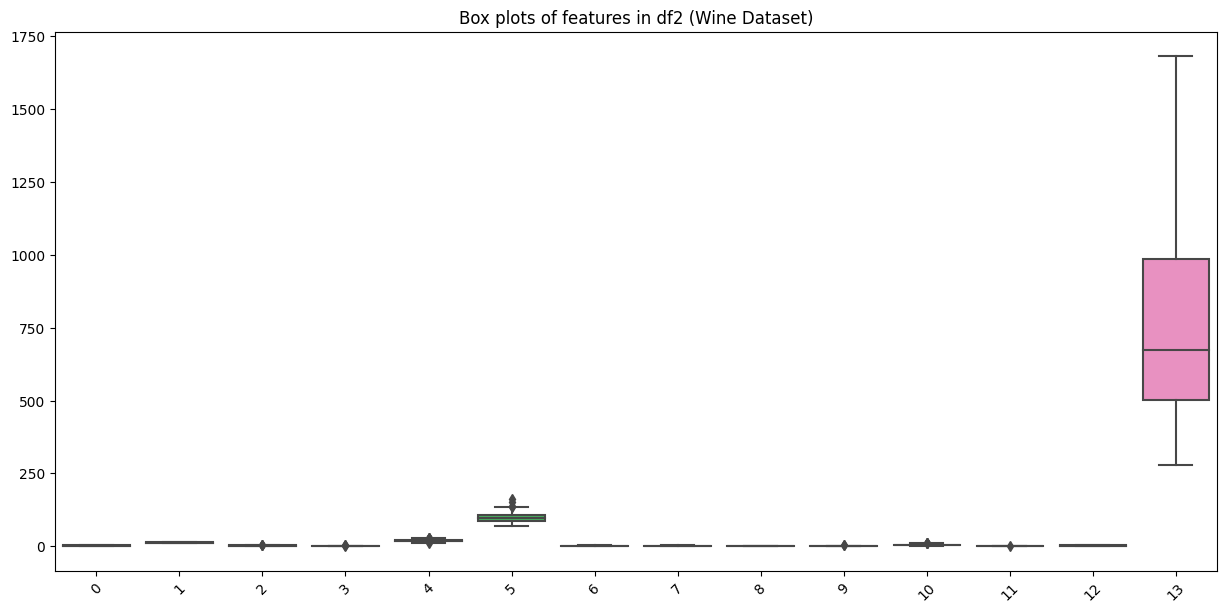

In [345]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Draw a box plot for each feature in df2
sns.boxplot(data=df2)
plt.title('Box plots of features in df2 (Wine Dataset)')
plt.xticks(rotation=45)
plt.show()


In [346]:
print("Basic Statistics for df1 (Boston Housing Dataset):")
print(df1.describe(include='all'))  # include='all' to get statistics for categorical features as well


Basic Statistics for df1 (Boston Housing Dataset):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   1

In [347]:
# Display the distribution of the different wine classes
print("Distribution of Wine classes:\n", df2.iloc[:, 0].value_counts())

# Display basic statistics for the Wine dataset
print(df2.describe())

Distribution of Wine classes:
 2    71
1    59
3    48
Name: 0, dtype: int64
               0           1           2           3           4           5   \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

               6           7           8           9           10          11  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270  

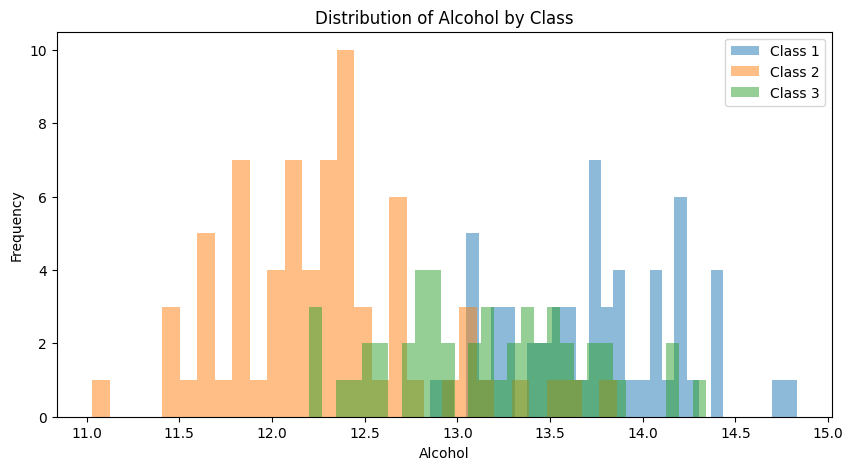

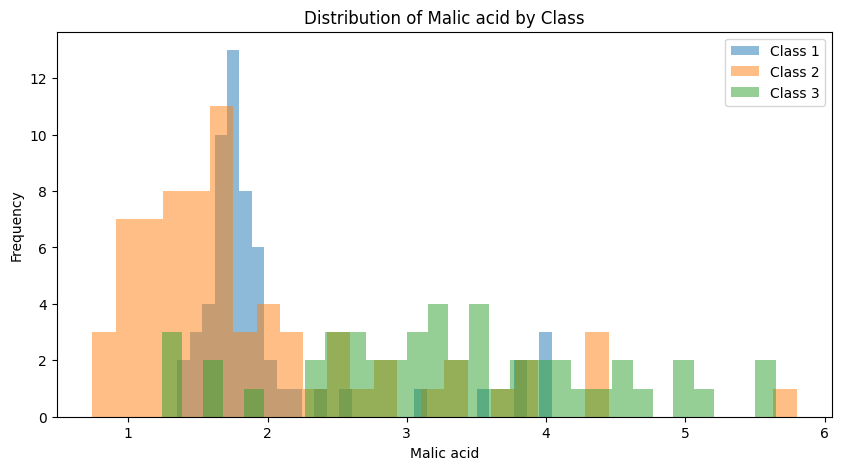

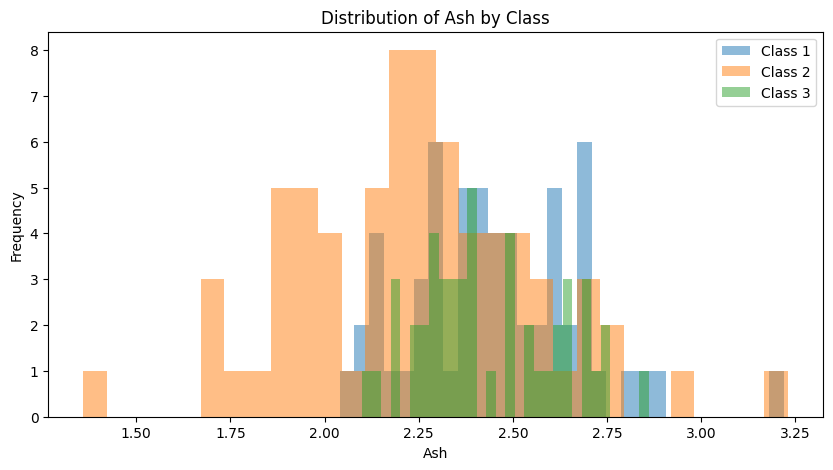

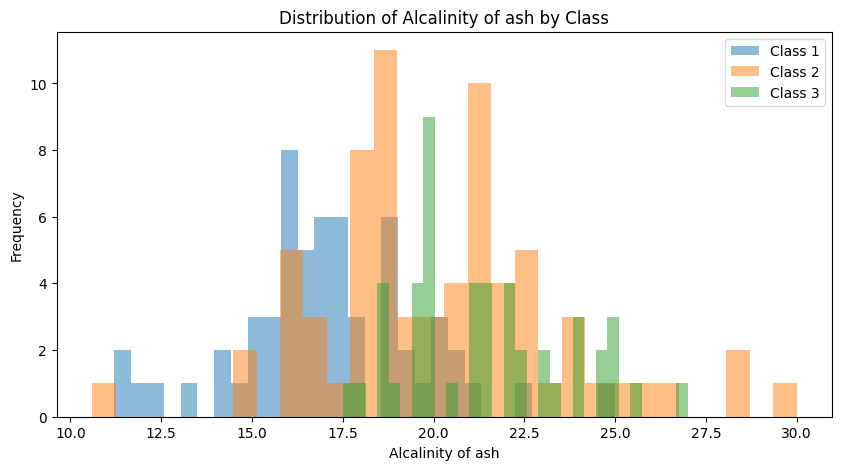

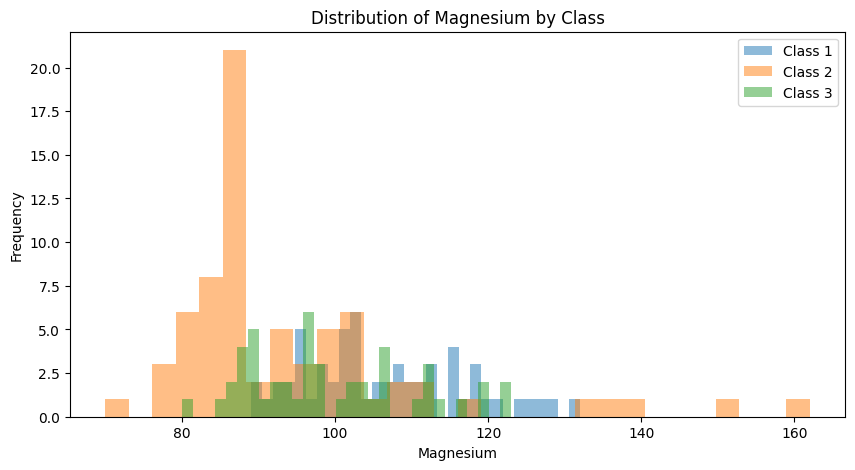

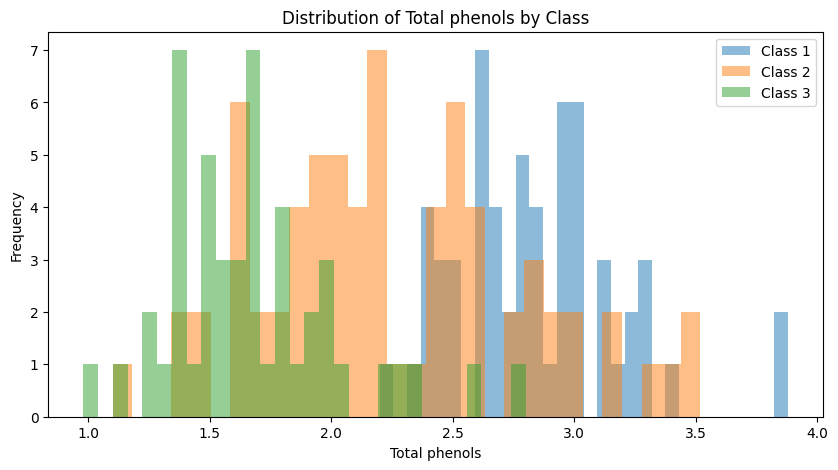

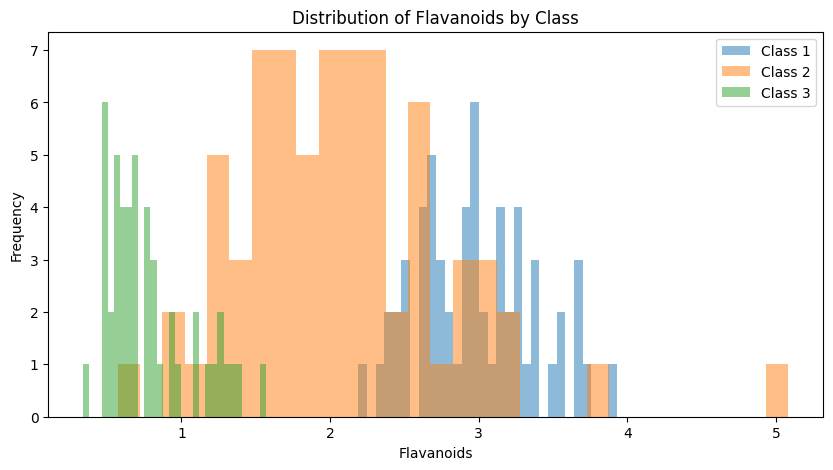

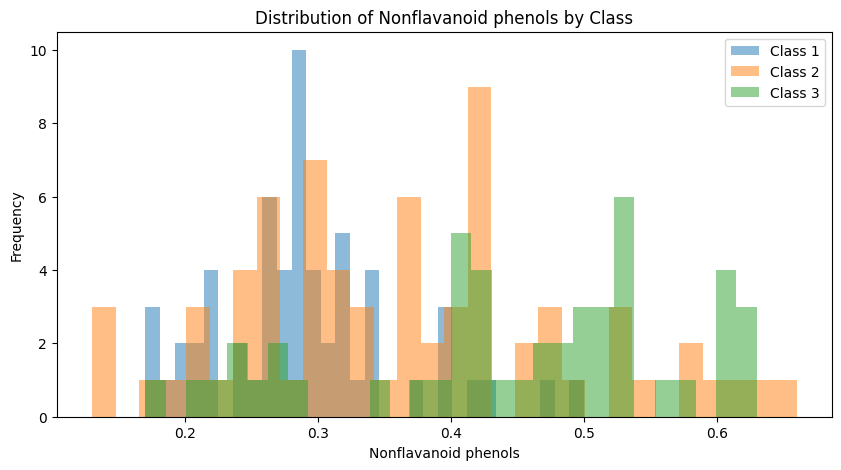

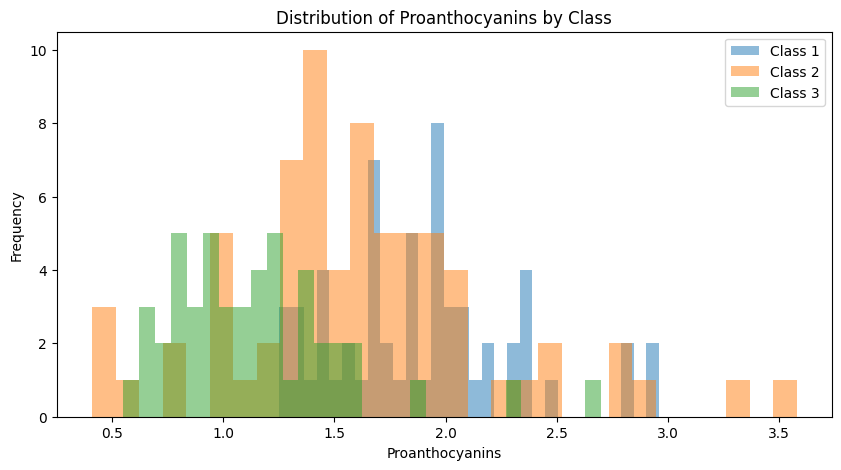

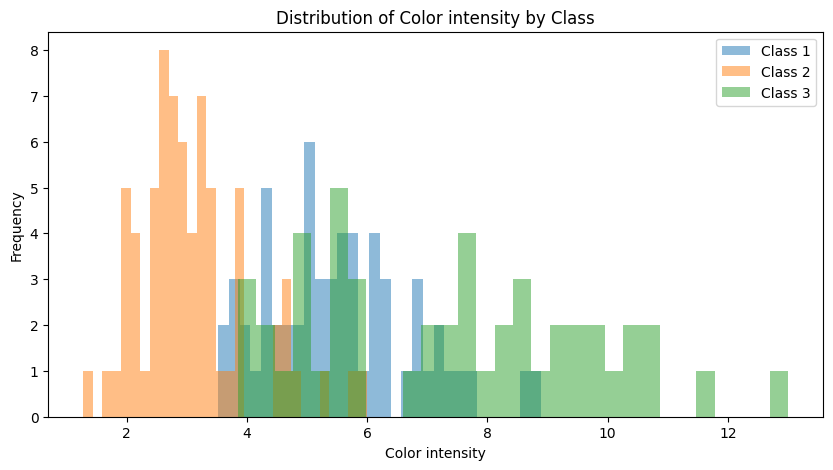

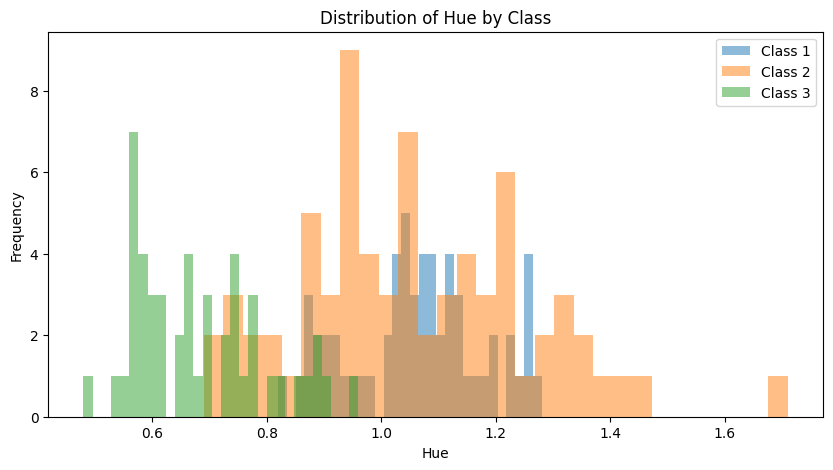

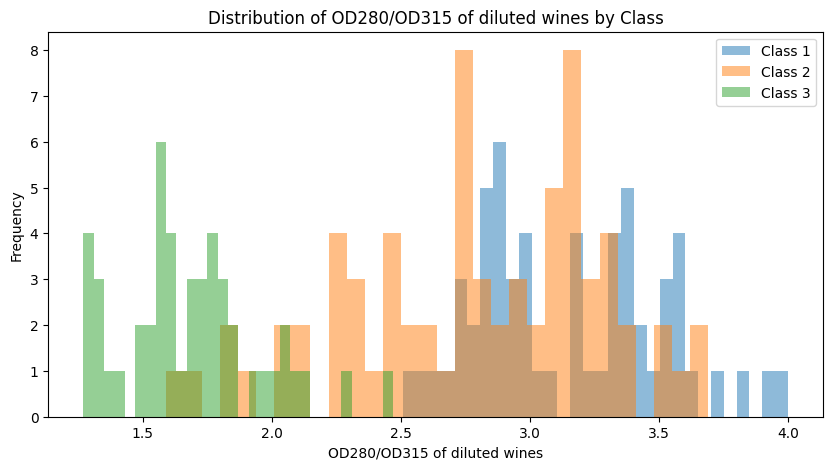

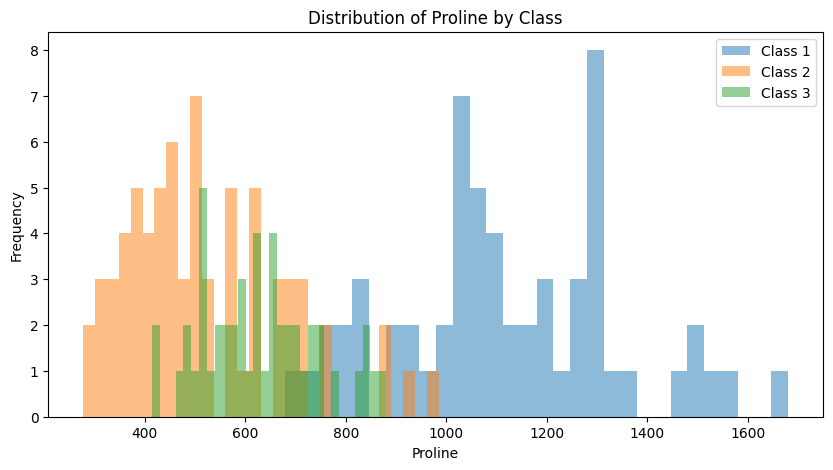

In [348]:
columns = [
    "Class",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
import matplotlib.pyplot as plt
import pandas as pd

df2.columns = columns  # Set column names

# Plot each feature against the class label
for col in columns[1:]:  # Exclude the "Class" column
    plt.figure(figsize=(10, 5))

    for label in df2["Class"].unique():
        plt.hist(df2[df2["Class"]==label][col], label=f"Class {label}", alpha=0.5, bins=30)

    plt.title(f"Distribution of {col} by Class")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [350]:
# Logistic regression (binary)
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



# Initialize weights
def initialize_weights(dim):
    return np.zeros((dim, 1))

# Compute radient and update weights
def update_weights(X, Y, weights, learning_rate):
    m = X.shape[0]
    predictions = sigmoid(np.dot(X, weights))
    gradients = np.dot(X.T, (predictions - Y)) / m
    weights -= learning_rate * gradients
    return weights

# Lost function
def cost(X, Y, weights):
    z = np.dot(X, weights)
    return np.mean(Y * np.log1p(np.exp(-z)) + (1 - Y) * np.log1p(np.exp(z)))


# Fit
def logistic_fit(X, Y, learning_rate, max_iters, gradient_threshold):
    m, n = X.shape
    weights = initialize_weights(n)

    for epoch in range(max_iters):
        z = np.dot(X, weights)  # Compute the weighted sum of inputs
        predictions = sigmoid(z)

        # Compute the gradients
        gradients = np.dot(X.T, (predictions - Y)) / m

        # Check if the norm of the gradient is below a certain threshold
        if np.linalg.norm(gradients) < gradient_threshold:
            print("Converged at epoch:", epoch)
            break

        # Update the weights
        weights -= learning_rate * gradients

        if epoch % 100 == 0:  # Print cost every 100 epochs
            print(f"Cost at epoch {epoch}:", cost(X, Y, weights))

    return weights



# Predict
def predict(X, weights):
    predictions = sigmoid(np.dot(X, weights))
    return np.round(predictions)  # round to get binary class labels




In [351]:
def logistic_fit_minibatch(X, Y, learning_rate, max_iters, gradient_threshold, batch_size):
    m, n = X.shape
    weights = initialize_weights(n)

    for epoch in range(max_iters):
        shuffled_indices = np.random.permutation(m)  # Shuffle indices to create random batches
        X_shuffled = X[shuffled_indices]
        Y_shuffled = Y[shuffled_indices]

        for i in range(0, m, batch_size):  # Move in steps of batch_size
            xi = X_shuffled[i:i+batch_size]
            yi = Y_shuffled[i:i+batch_size]

            z = np.dot(xi, weights)  # Compute the weighted sum of inputs for the mini-batch
            predictions = sigmoid(z)  # Apply the sigmoid function to get the probabilities

            gradients = np.dot(xi.T, (predictions - yi)) / batch_size

            weights -= learning_rate * gradients

        if epoch % 100 == 0:  # Print cost every 100 epochs
            print(f"Cost at epoch {epoch}:", cost(X, Y, weights))

        # Checking the convergence criterion
        if np.linalg.norm(gradients) < gradient_threshold:
            print("Converged at epoch:", epoch)
            break

    return weights



Cost at epoch 0: 0.3703367812918332
Converged at epoch: 84


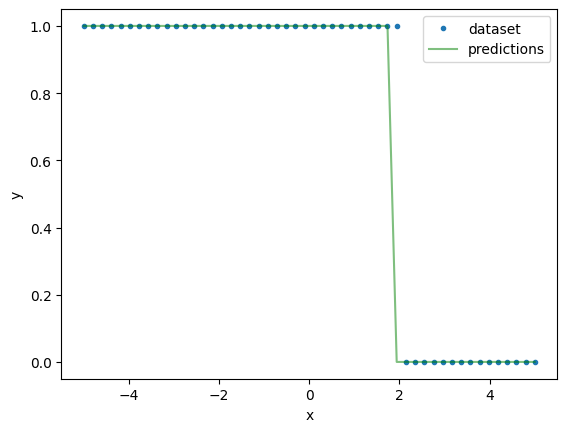

In [352]:
# Test

N = 50
x = np.linspace(-5, 5, N)
y = (x < 2).astype(int).reshape(-1, 1)

X = np.c_[np.ones((N, 1)), x.reshape(-1, 1)]  # Include bias term and reshape x to a column vector
# These values are just placeholders, adjust them based on your needs
learning_rate = 0.1
max_iters = 1000
gradient_threshold = 1e-4

weights = logistic_fit_minibatch(X, y, learning_rate, max_iters, gradient_threshold, batch_size=6)  # Adjust your fit function accordingly
yh = predict(X, weights)
plt.plot(x, y, '.', label='dataset')
plt.plot(x, yh, 'g', alpha=.5, label='predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [353]:
# Multiclass
def initialize_w(num_features, num_classes):
    return np.zeros((num_features, num_classes))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(Y, Y_pred):
    n_samples = Y.shape[0]
    return -1/n_samples * np.sum(Y * np.log(Y_pred))

def Multiclass_fit(X, Y, learning_rate, max_iters, gradient_threshold):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(Y))
    Y_one_hot = one_hot_encode(Y, num_classes)

    weights = initialize_w(num_features, num_classes)

    print_interval = max(max_iters // 5, 1)

    for epoch in range(max_iters):
        logits = np.dot(X, weights)
        Y_pred = softmax(logits)

        # Compute the gradients
        gradients = np.dot(X.T, (Y_pred - Y_one_hot)) / num_samples

        # Check if the norm of the gradient is below a certain threshold
        if np.linalg.norm(gradients) < gradient_threshold:
            print("Converged at epoch:", epoch)
            break

        # Update the weights
        weights -= learning_rate * gradients

        if epoch % print_interval == 0 or epoch == max_iters - 1:
            print(f"Cost at epoch {epoch}:", cross_entropy(Y_one_hot, Y_pred))

    return weights

def one_hot_encode(Y, num_classes):
    Y = Y - 1  # adjust labels to [0, num_classes - 1]
    return np.eye(num_classes)[Y.reshape(-1)]

def predict(X, weights):
    logits = np.dot(X, weights)
    Y_pred = softmax(logits)
    return np.argmax(Y_pred, axis=1) + 1  # Adding 1 to get back to the original class labels




In [354]:
def fit_minibatch_multiclass(X, Y, learning_rate, max_iters, gradient_threshold, batch_size):
    num_samples, num_features = X.shape
    num_classes = len(np.unique(Y))
    Y_one_hot = one_hot_encode(Y, num_classes)

    weights = initialize_w(num_features, num_classes)

    print_interval = max(max_iters // 5, 1)

    for epoch in range(max_iters):

        indices = np.random.choice(num_samples, batch_size, replace=False)
        X_mini_batch = X[indices]
        Y_mini_batch = Y_one_hot[indices]

        logits = np.dot(X_mini_batch, weights)
        Y_pred = softmax(logits)

        gradients = np.dot(X_mini_batch.T, (Y_pred - Y_mini_batch)) / batch_size

        weights -= learning_rate * gradients

        logits = np.dot(X, weights)
        Y_pred = softmax(logits)

        # Check if the norm of the gradient is below a certain threshold
        if np.linalg.norm(gradients) < gradient_threshold:
            print("Converged at epoch:", epoch)
            break

        if epoch % print_interval == 0 or epoch == max_iters - 1:
            print(f"Cost at epoch {epoch}:", cross_entropy(Y_one_hot, Y_pred))


    return weights


In [355]:
# Linear regression for Boston
X = df1.drop('MEDV',axis=1).values
m,n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)
def compute_gradients(weights,X,Y,choose=0,alpha=0.1):
# choose = 0 : linear ;=1: Ridge ; = 2: lasso
    m = len(Y)
    if(choose == 0):
        gradients = (1/m)*X.T.dot(X.dot(weights) - Y)
    if(choose == 1):
        weights[0] = 0
        gradients = 1/m * X.T.dot(X.dot(weights) - Y) +  alpha *weights
    return gradients

def compute_cost(weights,X,Y,choose=0,alpha=0.1):
# choose = 0 : linear ;=1: Ridge ; = 2: lasso
    m = len(Y)
    if(choose == 0):
        cost = (1 /  m) * np.sum(np.square(X.dot(weights) - Y))
    if(choose == 1):
        weights[0] = 0
        mse_loss = (1/  m) * np.sum(np.square(X.dot(weights)-Y))
        regluarization_loss = alpha * np.sum(np.square(weights))
        cost = mse_loss + regularization_loss
    return cost

def Standardized(X_train, X_test=None, choose=3):
    if X_test is None:
        single_test_sample = False
    elif len(X_test.shape) == 1:
        X_test = np.expand_dims(X_test, 0)
        single_test_sample = True
    else:
        single_test_sample = False

    if choose == 0:
        means = np.mean(X_train, axis=0)
        stds = np.std(X_train, axis=0)
        stds = np.where(stds == 0, 1, stds)
        X_train = (X_train - means) / stds
        if X_test is not None:
            X_test = (X_test - means) / stds
    elif choose == 1:
        l1_norm = np.sum(np.abs(X_train), axis=0, keepdims=True)
        X_train = X_train / l1_norm
        if X_test is not None:
            X_test = X_test / l1_norm
    elif choose == 2:
        l2_norm = np.sqrt(np.sum(X_train**2, axis=0, keepdims=True))
        X_train = X_train / l2_norm
        if X_test is not None:
            X_test = X_test / l2_norm
    elif choose == 3:
        data_min = np.min(X_train, axis=0)
        data_max = np.max(X_train, axis=0)
        range_vals = data_max - data_min
        range_vals = np.where(range_vals == 0, 1, range_vals)
        X_train = (X_train - data_min) / range_vals
        if X_test is not None:
            X_test = (X_test - data_min) / range_vals

    if X_test is None:
        return X_train
    else:
        if single_test_sample:
            X_test = X_test[0]
        return X_train, X_test


    if single_test_sample:
        X_test = X_test[0]
    return X_train,X_test

def Close_form_solution(X_train, Y_train):
    m, n = X_train.shape
    X_train = np.c_[np.ones((m, 1)), X_train]  # Adding bias term
    weights = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)  # Using pseudo-inverse
    cost = compute_cost(weights, X_train, Y_train, 0)
    return weights, cost



def gradient_descent(X_train,Y_train,num_epochs,eta):
    m,n = X_train.shape
    X_train = np.c_[np.ones((m,1)),X_train]
    weights = np.ones(n+1)
    weights = weights.reshape(-1,1)
    cost_history = []
    for epoch in range(num_epochs):
        gradients = compute_gradients(weights,X_train,Y_train,0)
        weights = weights - eta*gradients
        cost_history.append(compute_cost(weights,X_train,Y_train,0))
    return weights,cost_history[-1]
gradient_descent(X,Y,80000,0.000009)

#3.4 3.5
def fetch_minibatch(X,Y,minibatch_size):
    m,n = X.shape
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X[shuffled_indices]
    Y_shuffled = Y[shuffled_indices]
    X_mini = X_shuffled[0:minibatch_size]
    Y_mini = Y_shuffled[0:minibatch_size]
    return X_mini,Y_mini
def minibatch_gradient_descent(X,Y,minibatch_size,num_epochs,eta):
    m,n = X.shape
    weights = np.ones(n)
    weights = weights.reshape(-1,1)
    cost_history = []
    for epoch in range(num_epochs):
        X_mini,Y_mini = fetch_minibatch(X,Y,minibatch_size)
        m = len(Y_mini)
        gradients = compute_gradients(weights,X_mini,Y_mini)
        weights = weights - eta * gradients
        cost_history.append(compute_cost(weights, X, Y))
    return weights,cost_history[-1]

def linear_predict(X_test,weights):
    return X_test.dot(weights)


def train_test_split(X, Y, test_size=0.2):
    # 生成所有数据点的索引
    indices = np.arange(X.shape[0])
    # 打乱索引
    np.random.shuffle(indices)
    # 计算训练集的大小
    train_size = int(X.shape[0] * (1 - test_size))
    # 分割索引为训练集和测试集
    train_indices, test_indices = indices[:train_size], indices[train_size:]
    # 使用索引来获取训练集和测试集
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    return X_train, X_test, Y_train, Y_test

def train_test(X_train, X_test, Y_train, Y_test,minibatch_size,num_epochs,eta):
    weights,cost_train = minibatch_gradient_descent(X_train,Y_train,minibatch_size,num_epochs,eta)
    cost_test = compute_cost(weights, X_test, Y_test)
    return weights,cost_train,cost_test

Close_form_solution(X,Y)

(array([[ 4.16172702e+01],
        [-1.21388618e-01],
        [ 4.69634633e-02],
        [ 1.34676947e-02],
        [ 2.83999338e+00],
        [-1.87580220e+01],
        [ 3.65811904e+00],
        [ 3.61071055e-03],
        [-1.49075365e+00],
        [ 2.89404521e-01],
        [-1.26819813e-02],
        [-9.37532900e-01],
        [-5.52019101e-01]]),
 22.429681439489926)

In [356]:
X = df1.drop('MEDV',axis=1).values
m,n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)

In [357]:
# Task 3.1 for dataset2: Wine

# Extracting Feature Matrix and Target Variable
X2 = df2.iloc[:, 1:].values
Y2 = df2.iloc[:, 0].values.reshape(-1,1)

# Using the Standardized function with choose=3 for Min-Max scaling
X2 = Standardized(X2, choose=3)

# Adding Bias Term
X2 = np.c_[np.ones((X2.shape[0], 1)), X2]

# Splitting the data into 80/20 train/test
np.random.seed(551)

train_size2 = int(0.8 * X2.shape[0])
indices2 = np.random.permutation(X2.shape[0])
train_indices2, test_indices2 = indices2[:train_size2], indices2[train_size2:]

X_train2, X_test2 = X2[train_indices2], X2[test_indices2]
Y_train2, Y_test2 = Y2[train_indices2], Y2[test_indices2]





In [358]:
# Train
learning_rate = 0.1
max_iters = 1000
gradient_threshold = 1e-4

weights2 = Multiclass_fit(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold)



Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.4617214590964037
Cost at epoch 400: 0.30948061550363437
Cost at epoch 600: 0.2424751465015898
Cost at epoch 800: 0.2039923359329734
Cost at epoch 999: 0.17864579700796032


In [359]:
batch_size = 64  # test
weights2_minibatch = fit_minibatch_multiclass(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold, batch_size)


Cost at epoch 0: 1.0866126321954113
Cost at epoch 200: 0.4606735330035054
Cost at epoch 400: 0.30899810996501287
Cost at epoch 600: 0.2421677167999022
Cost at epoch 800: 0.20377022369420014
Cost at epoch 999: 0.1785152832174225


In [360]:
def evaluate_model(X, Y, weights):
    predictions = predict(X, weights)
    accuracy = np.mean(predictions == Y.flatten())

    # Calculate per-class precision, recall, and F1-score
    precision_list, recall_list, f1_list = [], [], []
    unique_classes = np.unique(Y)
    for cls in unique_classes:
        tp = np.sum((predictions == cls) & (Y.flatten() == cls))
        tn = np.sum((predictions != cls) & (Y.flatten() != cls))
        fp = np.sum((predictions == cls) & (Y.flatten() != cls))
        fn = np.sum((predictions != cls) & (Y.flatten() == cls))

        precision = tp / max((tp + fp), 1)
        recall = tp / max((tp + fn), 1)
        f1_score = 2 * (precision * recall) / max((precision + recall), 1e-10)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1_score)

    return accuracy, np.mean(precision_list), np.mean(recall_list), np.mean(f1_list)
train_metrics = evaluate_model(X_train2, Y_train2, weights2)
test_metrics = evaluate_model(X_test2, Y_test2, weights2)

print(f"Training Metrics: Accuracy={train_metrics[0]}, Precision={train_metrics[1]}, Recall={train_metrics[2]}, F1-Score={train_metrics[3]}")
print(f"Testing Metrics: Accuracy={test_metrics[0]}, Precision={test_metrics[1]}, Recall={test_metrics[2]}, F1-Score={test_metrics[3]}")



Training Metrics: Accuracy=0.9859154929577465, Precision=0.9857142857142858, Recall=0.9869554204660588, F1-Score=0.9862439803742377
Testing Metrics: Accuracy=1.0, Precision=1.0, Recall=1.0, F1-Score=1.0


In [361]:
def evaluate_model(X, Y, weights):
    predictions = predict(X, weights)
    print("Predictions distribution:")
    print(np.bincount(predictions))
    print("True labels distribution:")
    print(np.bincount(Y.flatten()))
    correct_predictions = predictions == Y.flatten()
    print("Correct predictions:", np.sum(correct_predictions))
    print("Total samples:", len(correct_predictions))
    print("Max iter:", max_iters)
    accuracy = np.mean(predictions == Y.flatten())

    # Calculate per-class precision, recall, and F1-score
    precision_list, recall_list, f1_list = [], [], []
    unique_classes = np.unique(Y)
    for cls in unique_classes:
        tp = np.sum((predictions == cls) & (Y.flatten() == cls))
        tn = np.sum((predictions != cls) & (Y.flatten() != cls))
        fp = np.sum((predictions == cls) & (Y.flatten() != cls))
        fn = np.sum((predictions != cls) & (Y.flatten() == cls))

        precision = tp / max((tp + fp), 1)
        recall = tp / max((tp + fn), 1)
        f1_score = 2 * (precision * recall) / max((precision + recall), 1e-10)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1_score)

    return accuracy, np.mean(precision_list), np.mean(recall_list), np.mean(f1_list)
train_metrics = evaluate_model(X_train2, Y_train2, weights2)
test_metrics = evaluate_model(X_test2, Y_test2, weights2)

print(f"Training Metrics: Accuracy={train_metrics[0]}, Precision={train_metrics[1]}, Recall={train_metrics[2]}, F1-Score={train_metrics[3]}")
print(f"Testing Metrics: Accuracy={test_metrics[0]}, Precision={test_metrics[1]}, Recall={test_metrics[2]}, F1-Score={test_metrics[3]}")


Predictions distribution:
[ 0 46 56 40]
True labels distribution:
[ 0 47 56 39]
Correct predictions: 140
Total samples: 142
Max iter: 1000
Predictions distribution:
[ 0 12 15  9]
True labels distribution:
[ 0 12 15  9]
Correct predictions: 36
Total samples: 36
Max iter: 1000
Training Metrics: Accuracy=0.9859154929577465, Precision=0.9857142857142858, Recall=0.9869554204660588, F1-Score=0.9862439803742377
Testing Metrics: Accuracy=1.0, Precision=1.0, Recall=1.0, F1-Score=1.0


In [362]:
'''
K = 15
np.random.seed(551)
# Lists to store averaged performance metrics over the K rounds
avg_train_accuracies = []
avg_test_accuracies = []
avg_train_precisions = []
avg_test_precisions = []
avg_train_recalls = []
avg_test_recalls = []
avg_train_f1s = []
avg_test_f1s = []

for i in range(K):
    # Shuffle and split data for each round
    indices2 = np.random.permutation(X2.shape[0])
    train_indices2, test_indices2 = indices2[:train_size2], indices2[train_size2:]
    X_train2, X_test2 = X2[train_indices2], X2[test_indices2]
    Y_train2, Y_test2 = Y2[train_indices2], Y2[test_indices2]

    # Train model
    weights2 = Multiclass_fit(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold)

    # Evaluate model
    train_metrics = evaluate_model(X_train2, Y_train2, weights2)
    test_metrics = evaluate_model(X_test2, Y_test2, weights2)

    # Append metrics to their respective lists
    avg_train_accuracies.append(train_metrics[0])
    avg_test_accuracies.append(test_metrics[0])
    avg_train_precisions.append(train_metrics[1])
    avg_test_precisions.append(test_metrics[1])
    avg_train_recalls.append(train_metrics[2])
    avg_test_recalls.append(test_metrics[2])
    avg_train_f1s.append(train_metrics[3])
    avg_test_f1s.append(test_metrics[3])
'''

'\nK = 15\nnp.random.seed(551)\n# Lists to store averaged performance metrics over the K rounds\navg_train_accuracies = []\navg_test_accuracies = []\navg_train_precisions = []\navg_test_precisions = []\navg_train_recalls = []\navg_test_recalls = []\navg_train_f1s = []\navg_test_f1s = []\n\nfor i in range(K):\n    # Shuffle and split data for each round\n    indices2 = np.random.permutation(X2.shape[0])\n    train_indices2, test_indices2 = indices2[:train_size2], indices2[train_size2:]\n    X_train2, X_test2 = X2[train_indices2], X2[test_indices2]\n    Y_train2, Y_test2 = Y2[train_indices2], Y2[test_indices2]\n\n    # Train model\n    weights2 = Multiclass_fit(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold)\n\n    # Evaluate model\n    train_metrics = evaluate_model(X_train2, Y_train2, weights2)\n    test_metrics = evaluate_model(X_test2, Y_test2, weights2)\n\n    # Append metrics to their respective lists\n    avg_train_accuracies.append(train_metrics[0])\n    avg_tes

In [363]:
'''
# Plotting the average metrics over the K rounds
k = [i for i in range(K)]
plt.figure(figsize=(15, 10))

# Plotting Train and Test Accuracy
plt.subplot(2, 2, 1)
plt.plot(k, avg_train_accuracies, label='Train Accuracy', color='blue')
plt.plot(k, avg_test_accuracies, label='Test Accuracy', color='orange')
plt.xlabel('Kth Round')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy over K Rounds')

# Plotting Train and Test Precision
plt.subplot(2, 2, 2)
plt.plot(k, avg_train_precisions, label='Train Precision', color='blue')
plt.plot(k, avg_test_precisions, label='Test Precision', color='orange')
plt.xlabel('Kth Round')
plt.ylabel('Precision')
plt.legend()
plt.title('Model Precision over K Rounds')

# Plotting Train and Test Recall
plt.subplot(2, 2, 3)
plt.plot(k, avg_train_recalls, label='Train Recall', color='blue')
plt.plot(k, avg_test_recalls, label='Test Recall', color='orange')
plt.xlabel('Kth Round')
plt.ylabel('Recall')
plt.legend()
plt.title('Model Recall over K Rounds')

# Plotting Train and Test F1-Score
plt.subplot(2, 2, 4)
plt.plot(k, avg_train_f1s, label='Train F1-Score', color='blue')
plt.plot(k, avg_test_f1s, label='Test F1-Score', color='orange')
plt.xlabel('Kth Round')
plt.ylabel('F1-Score')
plt.legend()
plt.title('Model F1-Score over K Rounds')

plt.tight_layout()
plt.show()

# Combined Plot
plt.figure(figsize=(12, 8))
plt.plot(k, avg_train_accuracies, label='Train Accuracy')
plt.plot(k, avg_test_accuracies, label='Test Accuracy')
plt.plot(k, avg_train_precisions, label='Train Precision')
plt.plot(k, avg_test_precisions, label='Test Precision')
plt.plot(k, avg_train_recalls, label='Train Recall')
plt.plot(k, avg_test_recalls, label='Test Recall')
plt.plot(k, avg_train_f1s, label='Train F1-Score')
plt.plot(k, avg_test_f1s, label='Test F1-Score')

plt.xlabel('Kth Round')
plt.ylabel('Performance Metrics')
plt.legend()
plt.title('Combined Model Performance over K Rounds')
plt.show()
'''

"\n# Plotting the average metrics over the K rounds\nk = [i for i in range(K)]\nplt.figure(figsize=(15, 10))\n\n# Plotting Train and Test Accuracy\nplt.subplot(2, 2, 1)\nplt.plot(k, avg_train_accuracies, label='Train Accuracy', color='blue')\nplt.plot(k, avg_test_accuracies, label='Test Accuracy', color='orange')\nplt.xlabel('Kth Round')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.title('Model Accuracy over K Rounds')\n\n# Plotting Train and Test Precision\nplt.subplot(2, 2, 2)\nplt.plot(k, avg_train_precisions, label='Train Precision', color='blue')\nplt.plot(k, avg_test_precisions, label='Test Precision', color='orange')\nplt.xlabel('Kth Round')\nplt.ylabel('Precision')\nplt.legend()\nplt.title('Model Precision over K Rounds')\n\n# Plotting Train and Test Recall\nplt.subplot(2, 2, 3)\nplt.plot(k, avg_train_recalls, label='Train Recall', color='blue')\nplt.plot(k, avg_test_recalls, label='Test Recall', color='orange')\nplt.xlabel('Kth Round')\nplt.ylabel('Recall')\nplt.legend()\nplt.ti

Text(0, 0.5, 'Cost')

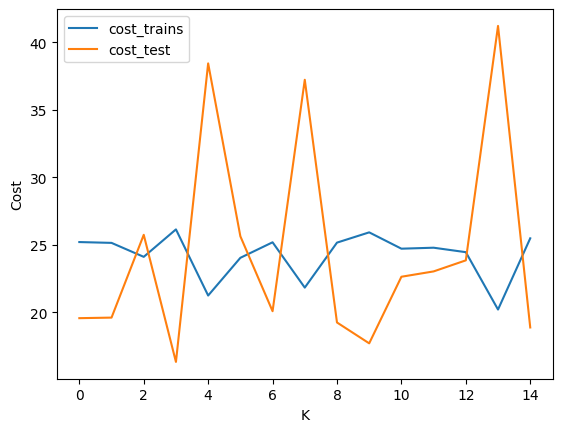

In [364]:
#3.1 for df1 Boston

X = df1.drop('MEDV',axis=1).values
Y = df1['MEDV'].values.reshape(-1,1)

K = 15
cost_trains = []
cost_tests = []

np.random.seed(551)
for i in range(0, K):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    # Standardize the data after splitting
    X_train, X_test = Standardized(X_train, X_test, choose=3)

    # Add intercept term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    weights, cost_train, cost_test = train_test(X_train, X_test, Y_train, Y_test, 400, 1000, 0.1)
    cost_trains.append(cost_train)
    cost_tests.append(cost_test)

k = [i for i in range(K)]
plt.plot(k, cost_trains, label='cost_trains')
plt.plot(k, cost_tests, label='cost_test')
plt.legend()
plt.xlabel('K')
plt.ylabel('Cost')


In [365]:
# 3.1 boston, only 1 result needed for report

X = df1.drop('MEDV', axis=1).values
Y = df1['MEDV'].values.reshape(-1,1)

np.random.seed(551)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Standardize the data after splitting
X_train, X_test = Standardized(X_train, X_test, choose=3)

# Add intercept term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

weights, cost_train, cost_test = train_test(X_train, X_test, Y_train, Y_test, 400, 1000, 0.1)

print(f"Training Cost: {cost_train}")
print(f"Testing Cost: {cost_test}")



Training Cost: 25.21583556009918
Testing Cost: 19.579815465804106


In [366]:
# 3.2 for df2 Wine

np.random.seed(551)  # for reproducibility
indices = np.random.permutation(len(X2))
X2 = X2[indices]
Y2 = Y2[indices]

k = 5  # number of folds
fold_size = len(X2) // k

for fold in range(k):
    start = fold * fold_size
    end = (fold + 1) * fold_size if fold != k - 1 else len(X2)

    X_val2, Y_val2 = X2[start:end], Y2[start:end]
    X_train2 = np.concatenate((X2[:start], X2[end:]), axis=0)
    Y_train2 = np.concatenate((Y2[:start], Y2[end:]), axis=0)

    # Standardize data after splitting
    X_train2, X_val2 = Standardized(X_train2, X_val2, choose=3)

    weights = Multiclass_fit(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold)

    # Evaluate Model on Training Data
    train_metrics = evaluate_model(X_train2, Y_train2, weights)
    print(f"Fold {fold+1} - Training Metrics: "
          f"Accuracy={train_metrics[0]}, "
          f"Precision={train_metrics[1]}, "
          f"Recall={train_metrics[2]}, "
          f"F1-Score={train_metrics[3]}")

    # Evaluate Model on Validation Data
    val_metrics = evaluate_model(X_val2, Y_val2, weights)
    print(f"Fold {fold+1} - Validation Metrics: "
          f"Accuracy={val_metrics[0]}, "
          f"Precision={val_metrics[1]}, "
          f"Recall={val_metrics[2]}, "
          f"F1-Score={val_metrics[3]}")





Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.4507137616000544
Cost at epoch 400: 0.306312444790993
Cost at epoch 600: 0.24359265941866085
Cost at epoch 800: 0.2076699447634366
Cost at epoch 999: 0.184021530870358
Predictions distribution:
[ 0 42 61 40]
True labels distribution:
[ 0 44 60 39]
Correct predictions: 140
Total samples: 143
Max iter: 1000
Fold 1 - Training Metrics: Accuracy=0.9790209790209791, Precision=0.9807377049180328, Recall=0.9792929292929293, F1-Score=0.979764189922886
Predictions distribution:
[ 0 15 10 10]
True labels distribution:
[ 0 15 11  9]
Correct predictions: 34
Total samples: 35
Max iter: 1000
Fold 1 - Validation Metrics: Accuracy=0.9714285714285714, Precision=0.9666666666666667, Recall=0.9696969696969697, F1-Score=0.9665831244778613
Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.47273010167756957
Cost at epoch 400: 0.329888514443954
Cost at epoch 600: 0.26800854803781266
Cost at epoch 800: 0.23265754085574378
Cost at epoch 999: 0.20935

In [367]:
# 3.2 for Linear regression on Boston
np.random.seed(551)
X = df1.drop('MEDV', axis=1).values
m, n = X.shape
Y = df1['MEDV'].values.reshape(-1, 1)


def k_fold_cross_validation(X, Y, k=5, minibatch_size=500, num_epochs=1000, eta=0.1):
    m, n = X.shape
    fold_size = m // k
    shuffled_indices = np.random.permutation(m)
    MSE = np.zeros(k)
    MSE2 = np.zeros(k)

    for i in range(k):
        test_indices = shuffled_indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(shuffled_indices, test_indices)

        X_train, X_test = X[train_indices], X[test_indices]
        Y_train, Y_test = Y[train_indices], Y[test_indices]

        # Standardize data after splitting
        X_train, X_test = Standardized(X_train, X_test, choose=3)

        # Add bias term after standardization
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        weights, cost_train, cost_test = train_test(X_train, X_test, Y_train, Y_test, minibatch_size, num_epochs, eta)
        MSE[i] = cost_test
        MSE2[i] = cost_train

    avg_test_cost = np.mean(MSE)
    avg_train_cost = np.mean(MSE2)

    print("Test Costs:", MSE)
    print("Train Costs:", MSE2)
    return avg_train_cost, avg_test_cost


# k-fold cross-validation
Y_train = Y
M = k_fold_cross_validation(X, Y_train, k=5, minibatch_size=500, num_epochs=1000, eta=0.1)
print(M)


Test Costs: [36.30431857 26.61303586 22.15987241 24.42556413 19.71950447]
Train Costs: [21.82571826 23.48181426 25.05577497 24.26063166 25.16902298]
(23.95859242425352, 25.844459087586284)


In [368]:
np.random.seed(551)

X = df1.drop('MEDV',axis=1).values
m, n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)

def create_k_folds(X, Y, k=5):
    fold_size = len(Y) // k
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    folds = []

    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        # Splitting the data
        X_train, X_test = X[train_indices], X[test_indices]
        Y_train, Y_test = Y[train_indices], Y[test_indices]

        # Standardizing the data after splitting
        X_train, X_test = Standardized(X_train, X_test, choose=3)

        # Adding bias term
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        folds.append((X_train, X_test, Y_train, Y_test))
    return folds

k = 5
folds = create_k_folds(X, Y, k)
all_train_costs = []
all_test_costs = []

for fold in folds:
    X_train, X_test, Y_train, Y_test = fold
    weights, train_cost, test_cost = train_test(X_train, X_test, Y_train, Y_test, 50, 1000, 0.1)
    print(train_cost)
    all_train_costs.append(train_cost)
    all_test_costs.append(test_cost)

avg_train_cost = np.mean(all_train_costs)
avg_test_cost = np.mean(all_test_costs)

print(f"Average Training Cost over 5 folds: {avg_train_cost}")
print(f"Average Test Cost over 5 folds: {avg_test_cost}")



21.838261627785474
23.865271720555643
25.06667719609464
24.3122417630656
25.387401669986687
Average Training Cost over 5 folds: 24.093970795497608
Average Test Cost over 5 folds: 26.220188017320464


In [369]:
np.random.seed(551)
def compute_cost_for_closed_form(weights, X, Y):
    m = len(Y)
    cost = (1 / (m)) * np.sum(np.square(X.dot(weights) - Y))
    return cost

def closed_form_solution(X, Y):
    # The formula is W = (X^T * X)^(-1) * X^T * Y
    weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return weights

all_train_costs_closed_form = []
all_test_costs_closed_form = []

for fold in folds:
    X_train, X_test, Y_train, Y_test = fold

    weights = closed_form_solution(X_train, Y_train)

    train_cost = compute_cost_for_closed_form(weights, X_train, Y_train)
    test_cost = compute_cost_for_closed_form(weights, X_test, Y_test)

    print(train_cost)

    all_train_costs_closed_form.append(train_cost)
    all_test_costs_closed_form.append(test_cost)

avg_train_cost_closed_form = np.mean(all_train_costs_closed_form)
avg_test_cost_closed_form = np.mean(all_test_costs_closed_form)

print(f"Average Training Cost (Closed Form) over 5 folds: {avg_train_cost_closed_form}")
print(f"Average Test Cost (Closed Form) over 5 folds: {avg_test_cost_closed_form}")


20.390221934888626
21.64655200062362
23.024450107779792
22.68330989685709
23.161949032945177
Average Training Cost (Closed Form) over 5 folds: 22.18129659461886
Average Test Cost (Closed Form) over 5 folds: 24.669014784806045


Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.3154834457301178
Cost at epoch 400: 0.1960709721869505
Cost at epoch 600: 0.1459821105927668
Cost at epoch 800: 0.11759754586195334
Cost at epoch 999: 0.09909529515673021
Predictions distribution:
[ 0 11  9  8]
True labels distribution:
[ 0 11  9  8]
Correct predictions: 28
Total samples: 28
Max iter: 1000
Predictions distribution:
[ 0 14 13  9]
True labels distribution:
[ 0 12 15  9]
Correct predictions: 34
Total samples: 36
Max iter: 1000
Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.33485753537714996
Cost at epoch 400: 0.2094923938194756
Cost at epoch 600: 0.15789264431211303
Cost at epoch 800: 0.12908506223347402
Cost at epoch 999: 0.11044589097242587
Predictions distribution:
[ 0 25 18 13]
True labels distribution:
[ 0 25 18 13]
Correct predictions: 56
Total samples: 56
Max iter: 1000
Predictions distribution:
[ 0 14 13  9]
True labels distribution:
[ 0 12 15  9]
Correct predictions: 34
Total samples: 36
Max iter:

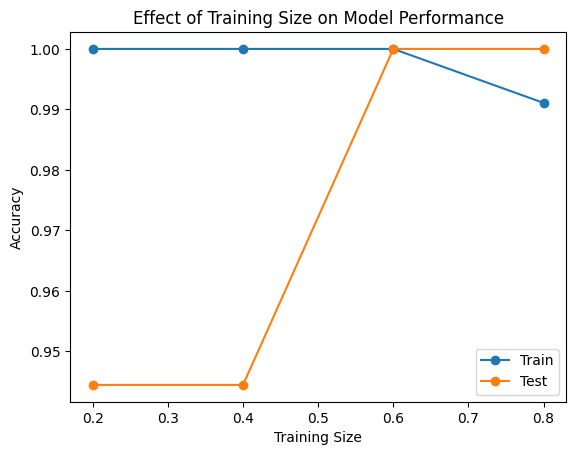

In [370]:
# 3.3
np.random.seed(551)
subset_sizes = np.linspace(0.2, 0.8, 4)  # Considering your step sizes to be 20%, 40%, 60%, 80%
train_accuracies = []
test_accuracies = []

for size in subset_sizes:
    subset_size = int(size * X_train2.shape[0])
    X_train_subset = X_train2[:subset_size]
    Y_train_subset = Y_train2[:subset_size]

    # Standardize after creating the subset
    X_train_subset, X_test_standardized = Standardized(X_train_subset, X_test2, choose=3)

    # Adding bias terms
    X_train_subset = np.c_[np.ones((X_train_subset.shape[0], 1)), X_train_subset]
    X_test_standardized = np.c_[np.ones((X_test_standardized.shape[0], 1)), X_test_standardized]

    # Train
    weights = Multiclass_fit(X_train_subset, Y_train_subset, learning_rate, max_iters, gradient_threshold)

    # Evaluate
    train_accuracy, _, _, _ = evaluate_model(X_train_subset, Y_train_subset, weights)
    test_accuracy, _, _, _ = evaluate_model(X_test_standardized, Y_test2, weights)

    # Store the results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.plot(subset_sizes, train_accuracies, '-o', label='Train')
plt.plot(subset_sizes, test_accuracies, '-o', label='Test')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Effect of Training Size on Model Performance')
plt.legend()
plt.show()



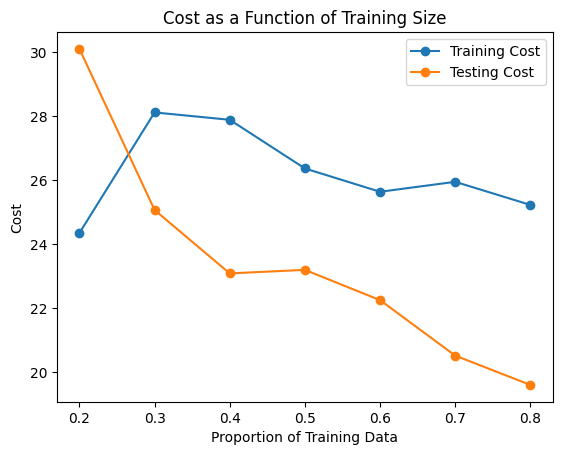

In [371]:
#3.3
np.random.seed(551)

X = df1.drop('MEDV',axis=1).values
Y = df1['MEDV'].values.reshape(-1,1)

shuffled_indices = np.random.permutation(X.shape[0])
X = X[shuffled_indices]
Y = Y[shuffled_indices]

cost_trains = []
cost_tests = []

subset_sizes = np.linspace(0.2, 0.8, 7)

for size in subset_sizes:
    subset_size = int(size * X.shape[0])
    X_train_subset = X[:subset_size]
    Y_train_subset = Y[:subset_size]

    # Remaining data is test data
    X_test_subset = X[subset_size:]
    Y_test_subset = Y[subset_size:]

    # Standardize data using the 'Standardized' function with choose=3
    X_train_subset, X_test_subset = Standardized(X_train_subset, X_test_subset, choose=3)

    # Add bias term after standardization
    X_train_subset = np.c_[np.ones((X_train_subset.shape[0], 1)), X_train_subset]
    X_test_subset = np.c_[np.ones((X_test_subset.shape[0], 1)), X_test_subset]

    weights, cost_train, cost_test = train_test(X_train_subset, X_test_subset, Y_train_subset, Y_test_subset, 400, 1000, 0.1)
    cost_trains.append(cost_train)
    cost_tests.append(cost_test)

# Plotting
plt.plot(subset_sizes, cost_trains, '-o', label='Training Cost')
plt.plot(subset_sizes, cost_tests, '-o', label='Testing Cost')
plt.legend()
plt.xlabel('Proportion of Training Data')
plt.ylabel('Cost')
plt.title('Cost as a Function of Training Size')
plt.show()


In [372]:
# 3.4 for Wine
import time  # to record training time
np.random.seed(551)
batch_sizes = [8, 16, 32, 64, 128, X_train2.shape[0]]  # The last one is for fully batched
learning_rate = 0.1
max_iters = 1000
gradient_threshold = 1e-4




results = {}

for batch_size in batch_sizes:
    print(f"\nRunning for batch size: {batch_size}")

    start_time = time.time()
    weights2 = fit_minibatch_multiclass(X_train2, Y_train2, learning_rate, max_iters, gradient_threshold, batch_size)
    end_time = time.time()

    train_time = end_time - start_time
    train_metrics = evaluate_model(X_train2, Y_train2, weights2)
    test_metrics = evaluate_model(X_test2, Y_test2, weights2)

    results[batch_size] = {
        "train_time": train_time,
        "train_metrics": train_metrics,
        "test_metrics": test_metrics
    }

# Presenting Results
for batch_size, res in results.items():
    print(f"\nBatch size: {batch_size}")
    print(f"Training Time: {res['train_time']} seconds")
    print(f"Training Accuracy: {res['train_metrics'][0]}, Precision: {res['train_metrics'][1]}, Recall: {res['train_metrics'][2]}, F1 Score: {res['train_metrics'][3]}")
    print(f"Test Accuracy: {res['test_metrics'][0]}, Precision: {res['test_metrics'][1]}, Recall: {res['test_metrics'][2]}, F1 Score: {res['test_metrics'][3]}")




Running for batch size: 8
Cost at epoch 0: 1.0808768275237723
Cost at epoch 200: 0.4492195921559839
Cost at epoch 400: 0.31177567355164726
Cost at epoch 600: 0.251874568267569
Cost at epoch 800: 0.21944632700760844
Cost at epoch 999: 0.1972697536817671
Predictions distribution:
[ 0 45 52 43]
True labels distribution:
[ 0 46 55 39]
Correct predictions: 133
Total samples: 140
Max iter: 1000
Predictions distribution:
[ 0 11 16  9]
True labels distribution:
[ 0 12 15  9]
Correct predictions: 35
Total samples: 36
Max iter: 1000

Running for batch size: 16
Cost at epoch 0: 1.0907453240009564
Cost at epoch 200: 0.44822651182023004
Cost at epoch 400: 0.3112189759881772
Cost at epoch 600: 0.25278832006993057
Cost at epoch 800: 0.21903876809805667
Cost at epoch 999: 0.1965459376994066
Predictions distribution:
[ 0 45 53 42]
True labels distribution:
[ 0 46 55 39]
Correct predictions: 134
Total samples: 140
Max iter: 1000
Predictions distribution:
[ 0 11 16  9]
True labels distribution:
[ 0 12 1

In [373]:
# 3.4 and partial 3.8 for Boston,
import numpy as np
import time

# Extracting data
X = df1.drop('MEDV',axis=1).values
Y = df1['MEDV'].values.reshape(-1,1)
np.random.seed(551)

batch_sizes = [8, 16, 32, 64, 128, X.shape[0]]  # X.shape[0] for fully batched
performance = {}



# Standardizing X using choose=3 method
X_standardized, _ = Standardized(X, X, choose=3)

# Adding the bias term after standardization
X_standardized = np.c_[np.ones((X_standardized.shape[0], 1)), X_standardized]

for size in batch_sizes:
    start_time = time.time()
    weights, cost, _ = train_test(X_standardized, X_standardized, Y, Y, minibatch_size=size, num_epochs=1000, eta=0.1)
    end_time = time.time()
    duration = end_time - start_time
    performance[size] = {'cost': cost, 'time': duration}

# Closed-form solution time
start_time = time.time()
weights_close, cost_close = Close_form_solution(X_standardized, Y)
end_time = time.time()
closed_form_time = end_time - start_time
performance['closed-form'] = {'cost': cost_close, 'time': closed_form_time}

# Print results
for size, metrics in performance.items():
    print(f"Batch Size: {size}, Cost: {metrics['cost']}, Time: {metrics['time']} seconds")




Batch Size: 8, Cost: 24.327493185129214, Time: 0.03995513916015625 seconds
Batch Size: 16, Cost: 24.63510845842021, Time: 0.05069589614868164 seconds
Batch Size: 32, Cost: 24.39806058375924, Time: 0.0373072624206543 seconds
Batch Size: 64, Cost: 24.428065396055608, Time: 0.03740978240966797 seconds
Batch Size: 128, Cost: 24.353885832031565, Time: 0.04211544990539551 seconds
Batch Size: 506, Cost: 24.190006053186597, Time: 0.05437493324279785 seconds
Batch Size: closed-form, Cost: 22.42968143948993, Time: 0.0006866455078125 seconds


In [374]:
# 3.5 for Wine

learning_rates = [0.001, 0.01, 0.3]
logistic_results = {}
max_iters = 1000
gradient_threshold = 1e-4
for lr in learning_rates:
    print(f"\nRunning Logistic Regression for learning rate: {lr}")
    weights = Multiclass_fit(X_train2, Y_train2, lr, max_iters, gradient_threshold)

    train_metrics = evaluate_model(X_train2, Y_train2, weights)
    test_metrics = evaluate_model(X_test2, Y_test2, weights)

    logistic_results[lr] = {"train_metrics": train_metrics, "test_metrics": test_metrics}

# Presenting Results
for lr, res in logistic_results.items():
    print(f"\nLearning Rate: {lr}")
    print(f"Training Accuracy: {res['train_metrics'][0]}, Precision: {res['train_metrics'][1]}, Recall: {res['train_metrics'][2]}, F1 Score: {res['train_metrics'][3]}")
    print(f"Test Accuracy: {res['test_metrics'][0]}, Precision: {res['test_metrics'][1]}, Recall: {res['test_metrics'][2]}, F1 Score: {res['test_metrics'][3]}")



Running Logistic Regression for learning rate: 0.001
Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 1.0777318546835246
Cost at epoch 400: 1.0588850033263069
Cost at epoch 600: 1.0415745301710497
Cost at epoch 800: 1.025447579631112
Cost at epoch 999: 1.0103261997556412
Predictions distribution:
[  0 104  32   4]
True labels distribution:
[ 0 46 55 39]
Correct predictions: 76
Total samples: 140
Max iter: 1000
Predictions distribution:
[ 0 26  7  3]
True labels distribution:
[ 0 12 15  9]
Correct predictions: 22
Total samples: 36
Max iter: 1000

Running Logistic Regression for learning rate: 0.01
Cost at epoch 0: 1.0986122886681098
Cost at epoch 200: 0.9433391296761146
Cost at epoch 400: 0.8351960143863336
Cost at epoch 600: 0.7492055161683563
Cost at epoch 800: 0.6797455222173604
Cost at epoch 999: 0.6232230189380995
Predictions distribution:
[ 0 52 47 41]
True labels distribution:
[ 0 46 55 39]
Correct predictions: 127
Total samples: 140
Max iter: 1000
Predictions distribution

Text(0, 0.5, 'Cost')

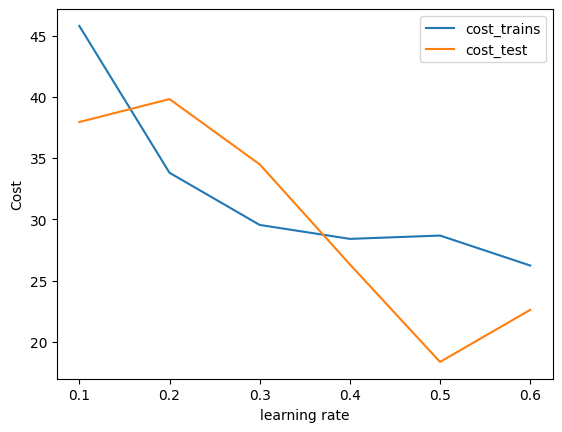

In [375]:
#3.5 linear
X = df1.drop('MEDV',axis=1).values
K = 6
Y = df1['MEDV'].values.reshape(-1,1)
cost_trains = []
cost_tests = []
np.random.seed(551)
for i in range(0,K):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    X_train, X_test = Standardized(X_train,X_test,choose=3)
    #intercept
    m,n = X_train.shape
    X_train = np.c_[np.ones((m,1)),X_train]
    m,n = X_test.shape
    X_test = np.c_[np.ones((m,1)),X_test]
    weights, cost_train, cost_test = train_test(X_train, X_test, Y_train, Y_test, 400, 100, 0.1+0.1*i)
    cost_trains.append(cost_train);
    cost_tests.append(cost_test)
k = [0.1+0.1*i for i in range(K)]
plt.plot(k, cost_trains, label='cost_trains')
plt.plot(k, cost_tests,label='cost_test')
plt.legend()
plt.xlabel('learning rate')
plt.ylabel('Cost')

In [376]:
# 3.5 distinct step sizes
X = df1.drop('MEDV',axis=1).values
Y = df1['MEDV'].values.reshape(-1,1)

np.random.seed(551)

learning_rates = [0.1, 0.3, 0.6]
cost_trains = []
cost_tests = []

for lr in learning_rates:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    X_train, X_test = Standardized(X_train,X_test,choose=3)

    # Add intercept
    X_train = np.c_[np.ones((X_train.shape[0],1)),X_train]
    X_test = np.c_[np.ones((X_test.shape[0],1)),X_test]

    weights, cost_train, cost_test = train_test(X_train, X_test, Y_train, Y_test, 64, 100, lr)
    cost_trains.append(cost_train)
    cost_tests.append(cost_test)

    print(f"For learning rate {lr}:")
    print(f"Training cost: {cost_train}")
    print(f"Testing cost: {cost_test}\n")


For learning rate 0.1:
Training cost: 45.91853435104926
Testing cost: 37.973149094467786

For learning rate 0.3:
Training cost: 29.597577106141692
Testing cost: 35.60565531588283

For learning rate 0.6:
Training cost: 26.829522996407174
Testing cost: 29.90937281686899



In [377]:
X_standardized, _ = Standardized(X, X, choose=3)
X_standardized = np.c_[np.ones((X_standardized.shape[0], 1)), X_standardized]


weights, cost_train, cost_test = train_test(X_standardized, X_standardized, Y, Y, 128, 1000, 0.3)

print(f"Training cost: {cost_train}")
print(f"Testing cost: {cost_test}\n")



Training cost: 22.708201776987952
Testing cost: 22.708201776987952



In [378]:
# 3.6 for Wine
def confusion_matrix_multiclass(actual, predicted, num_classes):

    matrix = np.zeros((num_classes, num_classes))
    for i in range(len(actual)):
        matrix[int(actual[i])-1][int(predicted[i])-1] += 1
    return matrix

# Using the provided Multiclass_fit function to train
weights_wine_minibatch = fit_minibatch_multiclass(X_train2, Y_train2, learning_rate=0.3, max_iters=1000, gradient_threshold=1e-4, batch_size=16)

# Predicting labels on the test set
predicted_labels = predict(X_test2, weights_wine)

# Generating the confusion matrix
matrix = confusion_matrix_multiclass(Y_test2, predicted_labels, 3)

# Display the matrix
print("Confusion Matrix:")
for row in matrix:
    print(row)


Cost at epoch 0: 1.0625366285948852
Cost at epoch 200: 0.25286906494553146
Cost at epoch 400: 0.18051572261801327
Cost at epoch 600: 0.15023507836814518
Cost at epoch 800: 0.1322727545216085
Cost at epoch 999: 0.12272963011560416
Confusion Matrix:
[11.  1.  0.]
[ 0. 15.  0.]
[0. 0. 9.]


In [379]:
# 3.7
X = df1.drop('MEDV',axis=1).values
m,n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)
np.random.seed(551)

def gaussian_basis_function(x, mu, s=1):
    return np.exp(- (x - mu)**2 / (2 * s**2))

def transform_with_gaussian_basis(X, s=1, n_basis_functions=5):
    # Randomly select 'n_basis_functions' mu values from X
    random_indices = np.random.choice(X.shape[0], n_basis_functions, replace=False)
    mus = X[random_indices, :]

    X_transformed = np.empty((X.shape[0], X.shape[1] * n_basis_functions))

    for i in range(X.shape[1]):
        for j, mu in enumerate(mus):
            # Transform each feature for each sample using the Gaussian basis function
            X_transformed[:, i * n_basis_functions + j] = gaussian_basis_function(X[:, i], mu[i], s)

    X_transformed = np.c_[np.ones((X_transformed.shape[0], 1)), X_transformed]

    return X_transformed

X_gaussian = transform_with_gaussian_basis(X)

def closed_form_solution(X, Y):
    return np.linalg.pinv(X.T @ X) @ X.T @ Y

X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

weights_gaussian = closed_form_solution(X_gaussian, Y)
weights_original = closed_form_solution(X_with_bias, Y)

def compute_mse(X, Y, weights):
    predictions = X @ weights
    return np.mean((predictions - Y)**2)

mse_original = compute_mse(X_with_bias, Y, weights_original)
mse_gaussian = compute_mse(X_gaussian, Y, weights_gaussian)

print(f"MSE with original features: {mse_original}")
print(f"MSE with Gaussian basis functions: {mse_gaussian}")


MSE with original features: 22.429681439489926
MSE with Gaussian basis functions: 15.353690509002142


In [380]:
def Standardized(X_train,X_test,St_choose=3):
# choose
    flag = 1
    if(len(X_test) == 1):
        flag = 0
    if(St_choose == 0):
        means = np.mean(X_train, axis=0)
        stds = np.std(X_train, axis=0)
        stds = np.where(stds == 0, 1, stds)
        X_train = (X_train - means) / stds
        X_test = (X_test - means) / stds
    if(St_choose == 1):
        l1_norm = np.sum(np.abs(X_train), axis=0, keepdims=True)
        X_train = X_train / l1_norm
        X_test = X_test / l1_norm
    if(St_choose == 2):
        l2_norm = np.sqrt(np.sum(X_train**2, axis=0, keepdims=True))
        X_train = X_train / l2_norm
        X_test = X_test / l2_norm
    if(St_choose == 3):
        data_min = np.min(X_train,axis=0)
        data_max = np.max(X_train,axis=0)
        X_train = (X_train - data_min) / (data_max - data_min)
        X_test =  (X_test - data_min) / (data_max - data_min)
    if(flag == 0):
        return X_train
    return X_train,X_test

In [381]:
X = df1.drop('MEDV',axis=1).values
m,n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)
def moment_gradients_descent(X_train,Y_train,num_epochs,eta,compute_cost_choose,compute_cost_alpha,momentum):
    m,n = X_train.shape
    X_train = np.c_[np.ones((m,1)),X_train]
    weights = np.ones(n+1)
    weights = weights.reshape(-1,1)
    cost_history = []
    v = 0
    for epoch in range(num_epochs):
        gradients = compute_gradients(weights,X_train,Y_train,compute_cost_choose,compute_cost_alpha)
        v = momentum*v+(1-momentum)*gradients
        weights = weights - eta*v
        cost_history.append(compute_cost(weights,X_train,Y_train,0,0.1))
    return weights,cost_history[-1]

In [382]:
X_train = Standardized(X,[0],3)
weights,cost =  moment_gradients_descent(X_train,Y,300,0.1,0,0.1,0.9)
weights2,cost2 =  weights,cost_train = minibatch_gradient_descent(X_train,Y,500,300,0.1)
cost,cost2

(30.608583131494285, 39.33536521773534)

Text(0, 0.5, 'MSE_Test')

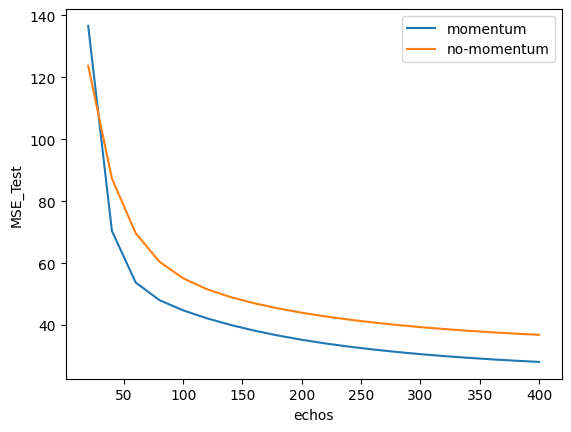

In [383]:
K = 20
k = [20+20*i for i in range(K)]
costs1 = []
costs2 = []
for i in range(0,K):
    weights,cost1 =  moment_gradients_descent(X_train,Y,20*i+20,0.1,0,0.1,0.9)
    weights2,cost2 =  weights,cost_train = minibatch_gradient_descent(X_train,Y,506,20*i+20,0.1)
    costs1.append(cost1)
    costs2.append(cost2)

plt.plot(k,costs1, label='momentum')
plt.plot(k,costs2, label='no-momentum')
plt.legend()
plt.xlabel('echos')
plt.ylabel('MSE_Test')

The best alpha value is: 1.9630406500402684


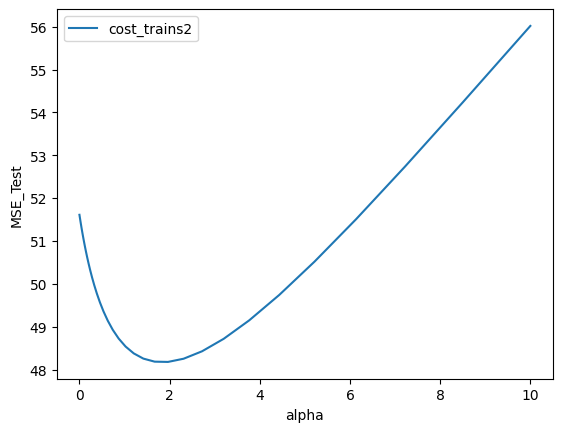

In [385]:
#扩展1
import numpy as np
np.random.seed(0)
X = df1.drop('MEDV',axis=1).values
m,n = X.shape
Y = df1['MEDV'].values.reshape(-1,1)
# 假设 X, y 是你的数据
# X = ...
# y = ...

# 定义 alpha 值的候选集
alphas = np.logspace(-6, 1, 100)

# 定义 k 折交叉验证
k = 5
fold_size = len(Y) // k
scores = []
# 对每个 alpha 值进行评估
for alpha in alphas:
    alpha_scores = []
 #   indices = np.arange(X.shape[0])
   # np.random.shuffle(indices)
 #   X = X[indices]
 #   Y = Y[indices]
    folds_X = []
    folds_Y = []
    for i in range(k):
        start_index = i * fold_size
        end_index = (i + 1) * fold_size if i != k - 1 else len(X)
        folds_X.append(X[start_index:end_index])
        folds_Y.append(Y[start_index:end_index])
    # 遍历每一折，将其作为验证集，其余折作为训练集
    for i in range(len(folds_X)):
        X_test = folds_X[i]
        Y_test = folds_Y[i]
        X_train = np.concatenate([folds_X[j] for j in range(len(folds_X)) if j != i])
        Y_train = np.concatenate([folds_Y[j] for j in range(len(folds_Y)) if j != i])

        X_train,X_test = Standardized(X_train,X_test,3)
        # 训练 Ridge 回归模型
        # 注意：这里我们手动实现 Ridge 回归模型的训练
        weights = np.linalg.inv(X_train.T.dot(X_train) + alpha * np.eye(X_train.shape[1])).dot(X_train.T).dot(Y_train)

        # 在验证集上评估模型
        Y_pred = X_test.dot(weights)
        mse = np.mean((Y_pred - Y_test)**2)
        alpha_scores.append(mse)

    # 记录当前 alpha 的平均性能
    scores.append(np.mean(alpha_scores))
# 选择最佳 alpha 值
K = alphas.shape[0]
k = [i for i in range(K)]
best_alpha = alphas[np.argmin(scores)]
plt.plot(alphas,scores, label='cost_trains2')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE_Test')
print(f"The best alpha value is: {best_alpha}")